In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv")
df.head()

,Date,S&P,Year,Month,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
0,2002-01-01,117.144,2002,1,50091.000000,12.287458,79.409,24.183,109297.0,1632.0,5.7,142.0,1.73,10514.7
1,2002-02-01,117.845,2002,2,50156.000000,12.287458,79.409,24.183,109297.0,1671.0,5.7,142.2,1.74,10531.6
2,2002-03-01,118.687,2002,3,50221.000000,12.287458,79.409,24.183,109297.0,1559.0,5.7,143.2,1.73,10539.0
3,2002-04-01,119.611,2002,4,50286.000000,12.287458,79.409,24.183,109297.0,1625.0,5.9,143.5,1.75,10574.2
4,2002-05-01,120.724,2002,5,50311.333333,12.287458,79.409,24.183,109297.0,1705.0,5.8,143.8,1.75,10616.5


In [3]:
df.set_index('Date', inplace=True)

In [4]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [5]:
df.tail()

,S&P,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
Date,,,,,,,,,,,
2021-09-01,270.377,65305.666667,16.678895,82.873,45.299,129224.0,1232.0,4.8,317.136,0.08,16564.3
2021-10-01,273.725,65651.000000,16.678895,82.873,45.299,129224.0,1259.0,4.5,322.120,0.08,16547.4
2021-11-01,277.210,65529.333333,16.678895,82.873,45.299,129224.0,1389.0,4.2,328.940,0.08,16499.8
2021-12-01,281.342,65407.666667,16.678895,82.873,45.299,129224.0,1337.0,3.9,335.032,0.08,16418.5
2022-01-01,285.924,65286.000000,17.128121,83.084,48.021,131202.0,1256.0,4.0,345.742,0.08,16080.8


In [6]:
df.shape

(241, 11)

In [7]:
df.columns.to_list()

['S&P',
 'Per Capita GDP',
 'old_percent',
 'Urban Population',
 'Subsidy',
 'Num_Households',
 'New Monthly Household',
 'Unemployment Rate',
 'construction material',
 'Interest Rate',
 'Income']

In [8]:
df.dtypes

S&P                      float64
Per Capita GDP           float64
old_percent              float64
Urban Population         float64
Subsidy                  float64
Num_Households           float64
New Monthly Household    float64
Unemployment Rate        float64
construction material    float64
Interest Rate            float64
Income                   float64
dtype: object

In [9]:
df.nunique().to_frame("Number of unique values")

,Number of unique values
S&P,241
Per Capita GDP,240
old_percent,21
Urban Population,21
Subsidy,21
Num_Households,21
New Monthly Household,224
Unemployment Rate,63
construction material,203
Interest Rate,106


In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

117.144    1
136.533    1
166.642    1
167.335    1
168.050    1
          ..
150.015    1
148.660    1
147.949    1
147.694    1
285.924    1
Name: S&P, Length: 241, dtype: int64


54520.333333    2
50091.000000    1
58548.000000    1
57841.666667    1
57981.333333    1
               ..
53153.000000    1
53085.000000    1
53017.000000    1
53038.333333    1
65286.000000    1
Name: Per Capita GDP, Length: 240, dtype: int64


12.287458    12
13.891076    12
16.678895    12
16.223400    12
15.791801    12
15.397698    12
15.066290    12
14.672311    12
14.327754    12
14.135563    12
13.584437    12
12.277934    12
13.270203    12
13.028178    12
12.856259    12
12.670858    12
12.507804    12
12.422072    12
12.360163    12
12.304719    12
17.128121     1
Name: old_percent, dtype: int64


79.409    12
81.299    12
82.873    12
82.664    12
82.459    12
82.256    12
82.058    12
81.862    12
81.671    12
81.483    12
81.119    12
79.583    12
80.944    12
80.772    12
80.606    12
80.43

In [11]:
df.describe()   #statistical summary of all the numerical columns

,S&P,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,172.320212,56663.788382,13.801604,81.085776,33.545863,120294.647303,1214.792531,6.110373,203.567614,1.295726,13230.232365
std,33.861670,3838.269320,1.413118,1.047680,5.655769,6238.616560,432.186522,1.961827,37.027762,1.545952,1841.363216
min,117.144000,50091.000000,12.277934,79.409000,24.183000,109297.000000,520.000000,3.500000,142.000000,0.050000,10514.700000
25%,146.394000,54100.000000,12.507804,80.269000,29.512000,116011.000000,839.000000,4.700000,182.500000,0.120000,11958.600000
50%,168.338000,55562.666667,13.584437,81.119000,33.283000,121084.000000,1182.000000,5.600000,205.500000,0.650000,12845.500000
75%,186.805000,59296.000000,15.066290,82.058000,37.550000,126224.000000,1589.000000,7.300000,217.300000,1.910000,14373.700000
max,285.924000,65651.000000,17.128121,83.084000,48.021000,131202.000000,2245.000000,14.700000,345.742000,5.260000,20422.600000


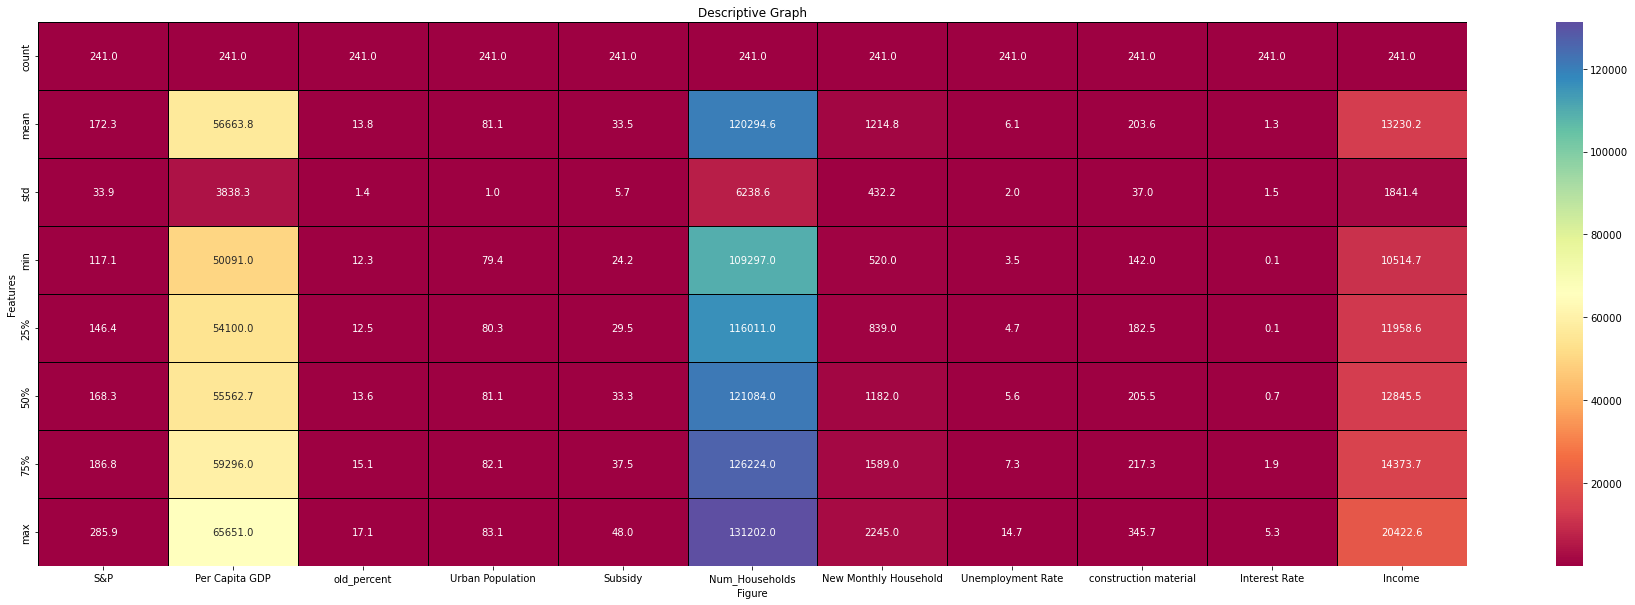

In [12]:
plt.figure(figsize=(32,10))
sns.heatmap(df.describe(),annot=True,fmt='0.1f',linewidth=1,linecolor='black',cmap='Spectral')
plt.xlabel('Figure')
plt.ylabel('Features')
plt.title("Descriptive Graph")
plt.show()

### Checking how the data is distributed 

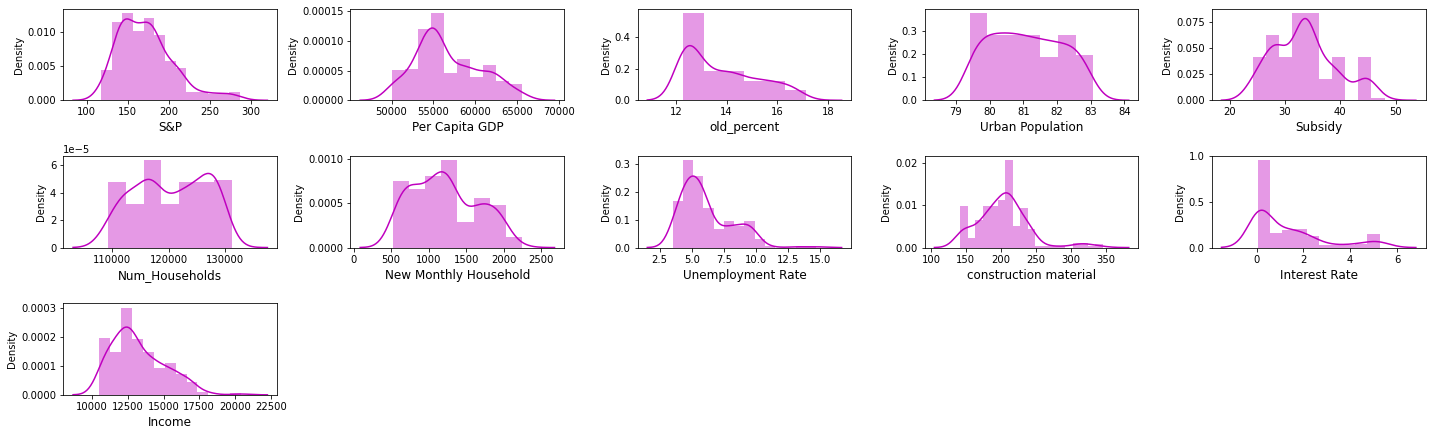

In [13]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1
for col in df.columns:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)   
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

<AxesSubplot:xlabel='Per Capita GDP', ylabel='S&P'>

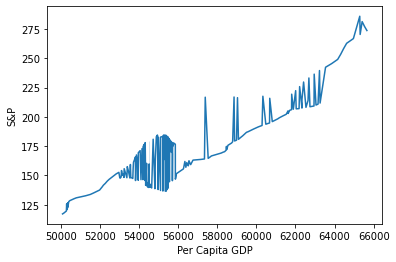

In [14]:
sns.lineplot(x='Per Capita GDP',y='S&P',data=df)

<AxesSubplot:xlabel='old_percent', ylabel='S&P'>

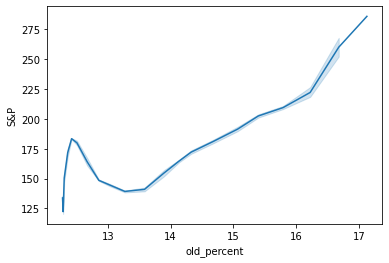

In [15]:
sns.lineplot(x='old_percent',y='S&P',data=df)

<AxesSubplot:xlabel='Interest Rate', ylabel='S&P'>

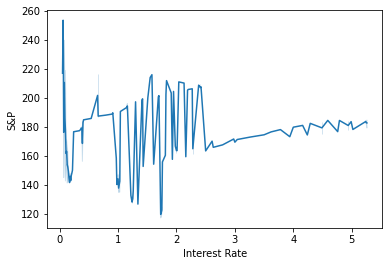

In [16]:
sns.lineplot(x='Interest Rate',y='S&P',data=df)

<AxesSubplot:xlabel='Urban Population', ylabel='S&P'>

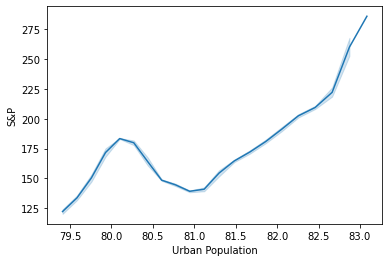

In [17]:
sns.lineplot(x='Urban Population',y='S&P',data=df)

<AxesSubplot:xlabel='Subsidy', ylabel='S&P'>

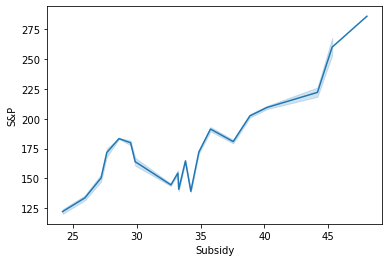

In [18]:
sns.lineplot(x='Subsidy',y='S&P',data=df)

<AxesSubplot:xlabel='Num_Households', ylabel='S&P'>

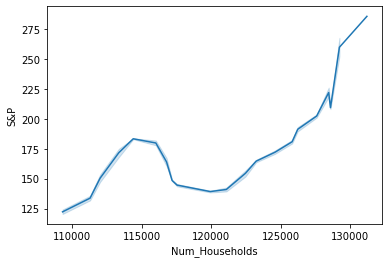

In [19]:
sns.lineplot(x='Num_Households',y='S&P',data=df)

<AxesSubplot:xlabel='New Monthly Household', ylabel='S&P'>

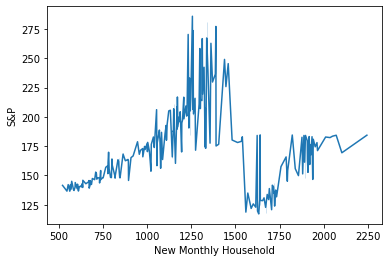

In [20]:
sns.lineplot(x='New Monthly Household',y='S&P',data=df)

<AxesSubplot:xlabel='Unemployment Rate', ylabel='S&P'>

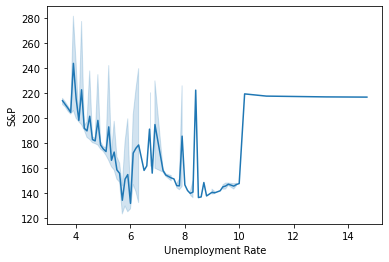

In [21]:
sns.lineplot(x='Unemployment Rate',y='S&P',data=df)

<AxesSubplot:xlabel='construction material', ylabel='S&P'>

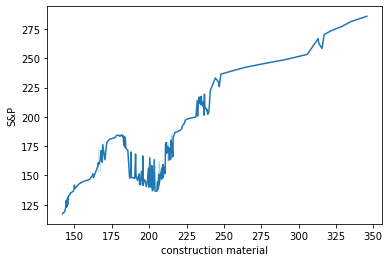

In [22]:
sns.lineplot(x='construction material',y='S&P',data=df)

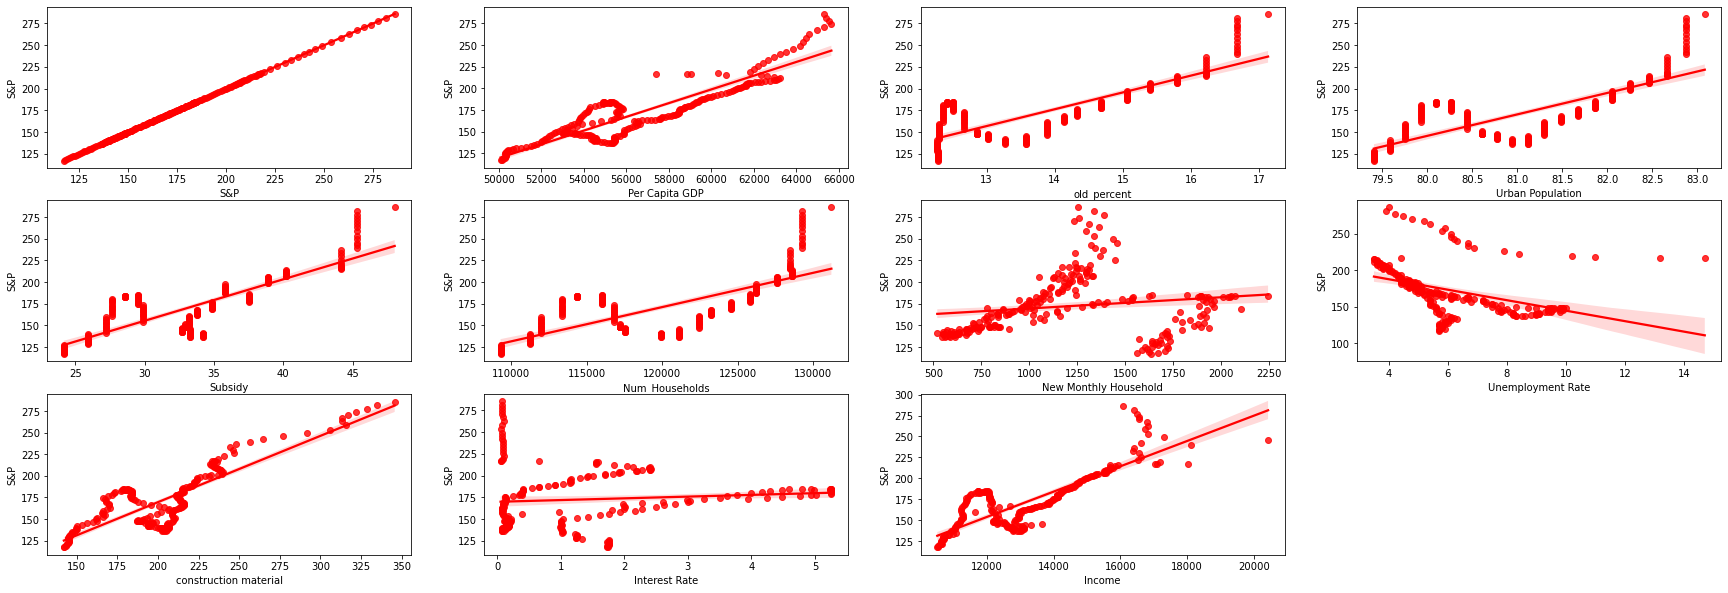

In [23]:
plt.figure(figsize=(30,35))
p=1
for i in df.columns:
    if p<=20:    
        plt.subplot(10,4,p) 
        sns.regplot(x=df[i],y='S&P',data=df,color='r')
        plt.xlabel(i)
        plt.ylabel('S&P')
    p+=1
plt.show()

### Outliers 

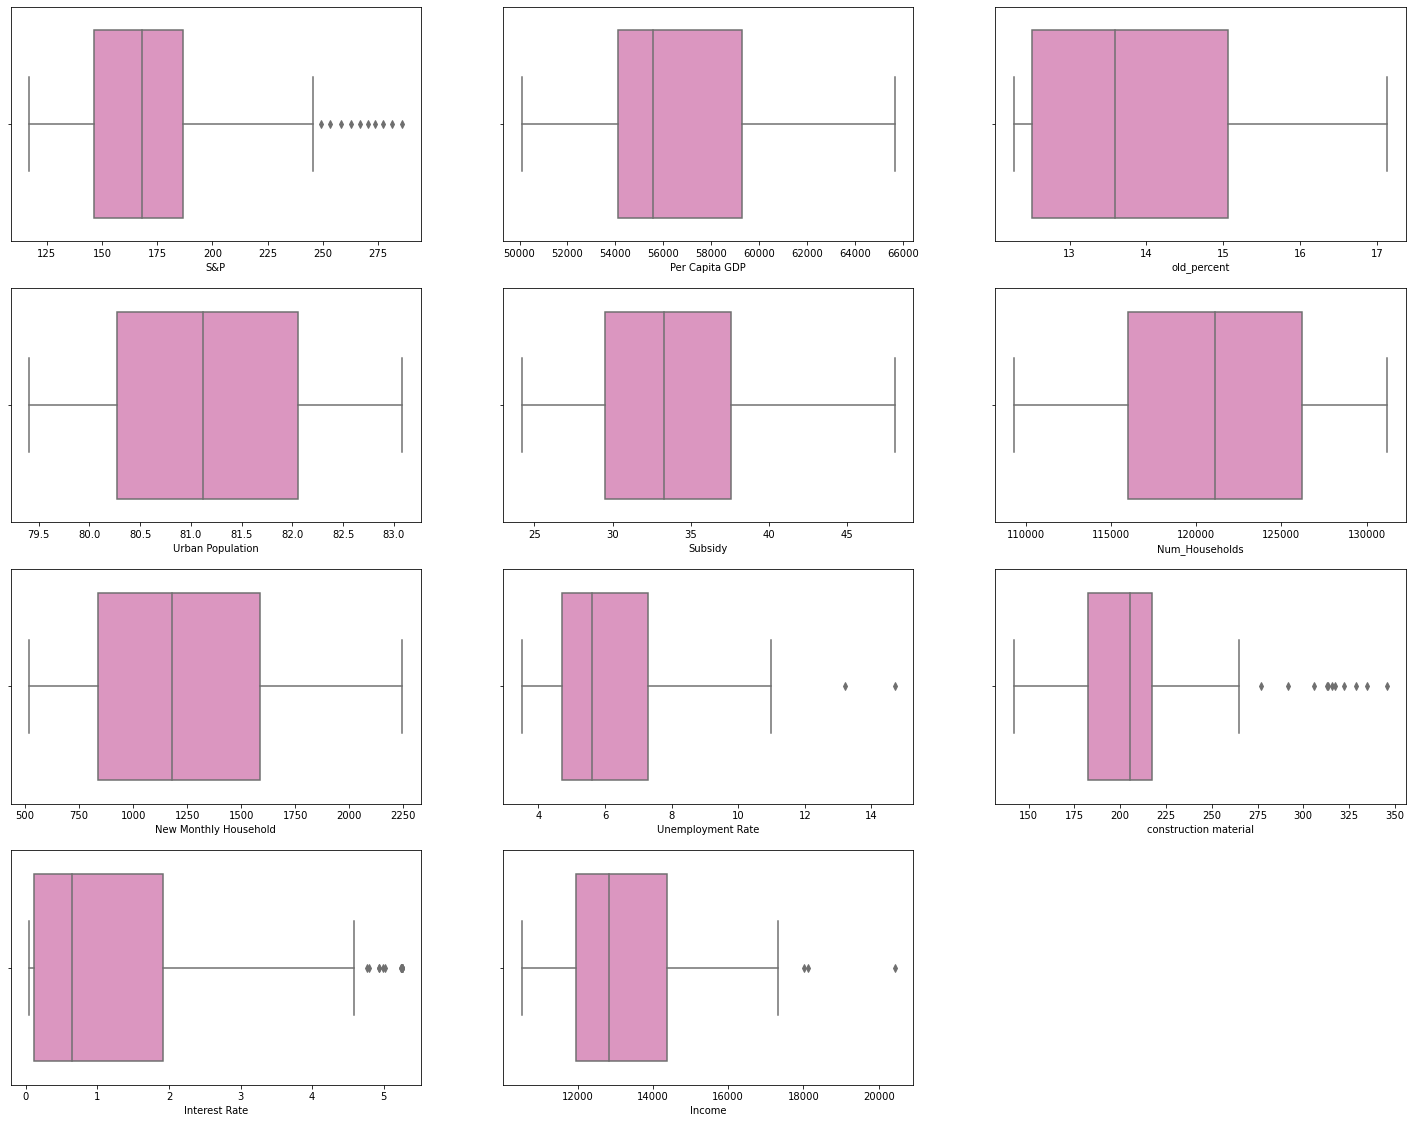

In [24]:
#Let's check the outliers by plotting the boxplot

plt.figure(figsize=(25,25))
p=1
for i in df:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

We can see that there outliers in Unemployment rate, construction material, Interest Rate, Income

We will not remove outliers from S&P as it is our target variable

Two methods to remove outliers are Z score and IQR method

### Zscore 

In [25]:
from scipy.stats import zscore
out_features=df[['Unemployment Rate','construction material','Interest Rate','Income']]
z=np.abs(zscore(out_features))  
z

,Unemployment Rate,construction material,Interest Rate,Income
Date,,,,
2002-01-01,0.209615,1.666202,0.281495,1.477809
2002-02-01,0.209615,1.660790,0.287977,1.468612
2002-03-01,0.209615,1.633727,0.281495,1.464585
2002-04-01,0.107457,1.625608,0.294459,1.445429
2002-05-01,0.158536,1.617489,0.294459,1.422409
...,...,...,...,...
2021-09-01,0.669325,3.073498,0.788030,1.814420
2021-10-01,0.822562,3.208379,0.788030,1.805223
2021-11-01,0.975799,3.392949,0.788030,1.779319


In [26]:
#threshold=3

np.where(z>3)

(array([219, 220, 230, 233, 236, 237, 238, 239, 240], dtype=int64),
 array([0, 0, 3, 1, 1, 1, 1, 1, 1], dtype=int64))

In [27]:
#Now removing the data above Z score and creating a new df

df1=df[(z<3).all(axis=1)]  
df1

,S&P,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
Date,,,,,,,,,,,
2002-01-01,117.144,50091.000000,12.287458,79.409,24.183,109297.0,1632.0,5.7,142.000,1.73,10514.7
2002-02-01,117.845,50156.000000,12.287458,79.409,24.183,109297.0,1671.0,5.7,142.200,1.74,10531.6
2002-03-01,118.687,50221.000000,12.287458,79.409,24.183,109297.0,1559.0,5.7,143.200,1.73,10539.0
2002-04-01,119.611,50286.000000,12.287458,79.409,24.183,109297.0,1625.0,5.9,143.500,1.75,10574.2
2002-05-01,120.724,50311.333333,12.287458,79.409,24.183,109297.0,1705.0,5.8,143.800,1.75,10616.5
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,242.369,63537.000000,16.678895,82.873,45.299,129224.0,1322.0,6.2,264.600,0.08,16604.9
2021-04-01,249.070,64157.000000,16.678895,82.873,45.299,129224.0,1438.0,6.1,291.800,0.07,17316.6
2021-05-01,253.407,64309.666667,16.678895,82.873,45.299,129224.0,1337.0,5.8,305.900,0.06,16819.1


In [28]:
#Checking the data loss percentage after removing the outliers

print("Data Loss Percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)    #Change in data/original data *100

Data Loss Percentage: 3.7344398340248963


### IQR Method 

In [29]:
#Now lets check with IQR method:

#1st Quantile
Q1=out_features.quantile(0.25)

#3rd Quantile
Q3=out_features.quantile(0.75)

IQR=Q3-Q1

df2=df[~((df < (Q1-1.5*IQR))|(df> (Q3+ 1.5*IQR))).any(axis=1)]

In [30]:
df2

,S&P,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
Date,,,,,,,,,,,
2002-01-01,117.144,50091.000000,12.287458,79.409,24.183,109297.0,1632.0,5.7,142.0,1.73,10514.7
2002-02-01,117.845,50156.000000,12.287458,79.409,24.183,109297.0,1671.0,5.7,142.2,1.74,10531.6
2002-03-01,118.687,50221.000000,12.287458,79.409,24.183,109297.0,1559.0,5.7,143.2,1.73,10539.0
2002-04-01,119.611,50286.000000,12.287458,79.409,24.183,109297.0,1625.0,5.9,143.5,1.75,10574.2
2002-05-01,120.724,50311.333333,12.287458,79.409,24.183,109297.0,1705.0,5.8,143.8,1.75,10616.5
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,225.837,62211.333333,16.223400,82.664,44.147,128451.0,1446.0,7.9,246.9,0.09,16607.9
2020-10-01,229.753,62414.000000,16.223400,82.664,44.147,128451.0,1370.0,6.9,246.4,0.09,16561.9
2020-11-01,233.208,62685.000000,16.223400,82.664,44.147,128451.0,1240.0,6.7,244.3,0.09,16368.1


In [31]:
print("Data Loss Percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)    #Change in data/original data *100

Data Loss Percentage: 13.692946058091287


We can see that the loss of data using Zscore is less than compare to IQR Method so we will go ahead with the Zscore method to get a better result in future

In [32]:
df=df1 # making the Zscore data frame after removing the outliers our main dataframe

In [33]:
#Checking skewness

df.skew()

S&P                      0.684539
Per Capita GDP           0.392692
old_percent              0.647909
Urban Population         0.106107
Subsidy                  0.396948
Num_Households          -0.079825
New Monthly Household    0.311505
Unemployment Rate        0.746431
construction material    0.339371
Interest Rate            1.324745
Income                   0.609420
dtype: float64

In [34]:
# the acceptable range for skewness-:
                    # 1)if its 0 the data is semetrical or normaly distriuted
                    # 2) acceptable range is -0.5 to 0.5  

In [35]:
#Removing skewness using cuberoot

df['old_percent']=np.cbrt(df['old_percent'])
df['Unemployment Rate']=np.cbrt(df['Unemployment Rate'])
df['Interest Rate']=np.cbrt(df['Interest Rate'])
df['Income']=np.cbrt(df['Income'])

In [36]:
df.skew()

S&P                      0.684539
Per Capita GDP           0.392692
old_percent              0.577853
Urban Population         0.106107
Subsidy                  0.396948
Num_Households          -0.079825
New Monthly Household    0.311505
Unemployment Rate        0.471388
construction material    0.339371
Interest Rate            0.403799
Income                   0.449118
dtype: float64

We can see that the skewness is removed from al most all the coulmns. we have not removed skewness from the S&P as it is our target variable

### Checking how the data is distributed in each column after removing outliers 

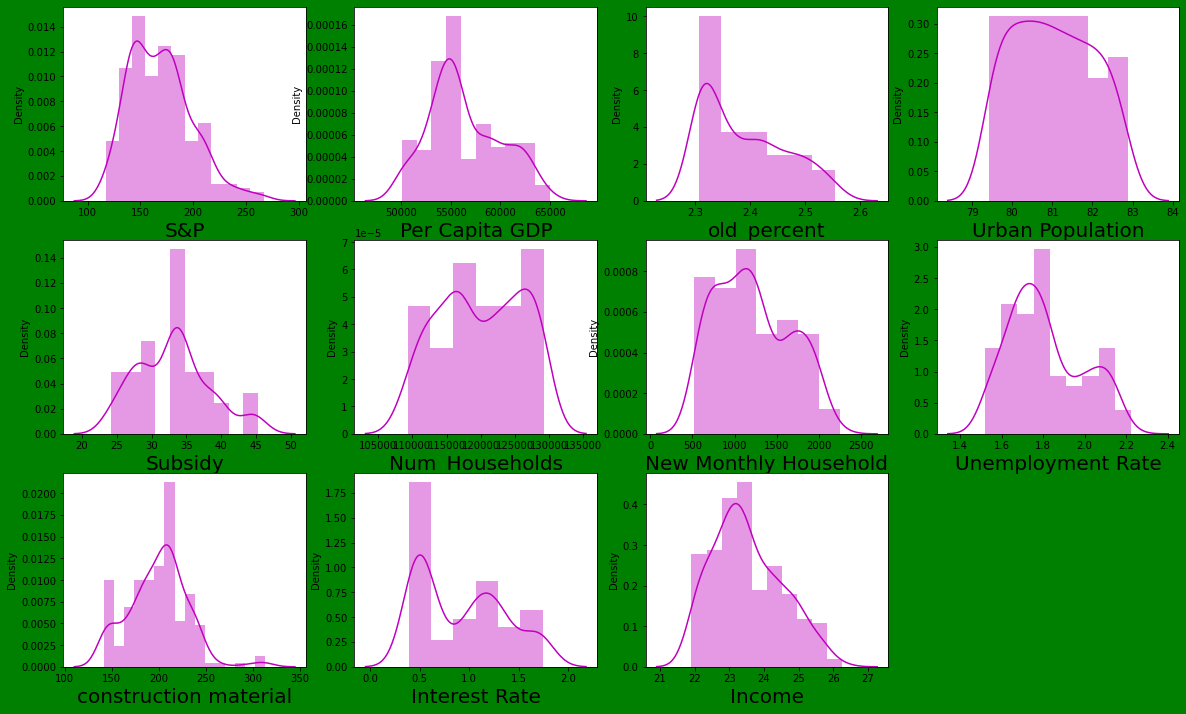

In [37]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for i in df:   
    if plotnumber<=15:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [38]:
# We dont need to perform encoding as all the data is already is the numeric type

### Correlation 

In [39]:
#Now we will check correlation with feature variables

df.corr()

,S&P,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
S&P,1.000000,0.890177,0.765046,0.739855,0.757259,0.712061,0.171042,-0.539602,0.774714,0.170472,0.804471
Per Capita GDP,0.890177,1.000000,0.941311,0.944533,0.911053,0.937546,-0.197528,-0.428005,0.921498,-0.119590,0.960044
old_percent,0.765046,0.941311,1.000000,0.978719,0.951338,0.960391,-0.327074,-0.263464,0.912532,-0.339513,0.976480
Urban Population,0.739855,0.944533,0.978719,1.000000,0.969868,0.994110,-0.451949,-0.189734,0.948043,-0.390394,0.984049
Subsidy,0.757259,0.911053,0.951338,0.969868,1.000000,0.949502,-0.431447,-0.088455,0.942572,-0.406680,0.976237
Num_Households,0.712061,0.937546,0.960391,0.994110,0.949502,1.000000,-0.479785,-0.204695,0.937284,-0.388030,0.967743
New Monthly Household,0.171042,-0.197528,-0.327074,-0.451949,-0.431447,-0.479785,1.000000,-0.572231,-0.440137,0.770157,-0.362647
Unemployment Rate,-0.539602,-0.428005,-0.263464,-0.189734,-0.088455,-0.204695,-0.572231,1.000000,-0.133532,-0.683260,-0.213839
construction material,0.774714,0.921498,0.912532,0.948043,0.942572,0.937284,-0.440137,-0.133532,1.000000,-0.372149,0.948674
Interest Rate,0.170472,-0.119590,-0.339513,-0.390394,-0.406680,-0.388030,0.770157,-0.683260,-0.372149,1.000000,-0.323915


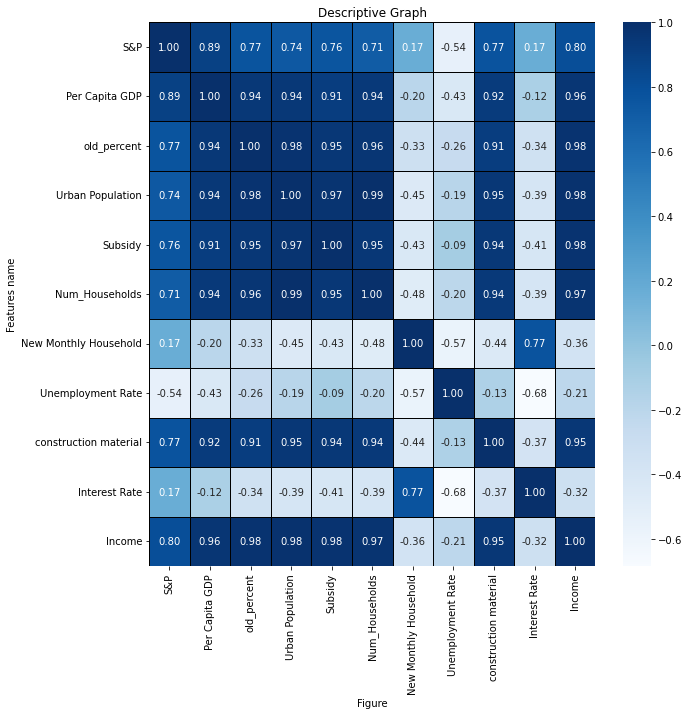

In [40]:
#Visualizing it on the heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,linecolor='black',cmap='Blues')
plt.xlabel("Figure")
plt.ylabel("Features name")
plt.title("Descriptive Graph")
plt.show()

In [41]:
#Checking the correlation of target variable only

df.corr()['S&P'].sort_values(ascending=False)

S&P                      1.000000
Per Capita GDP           0.890177
Income                   0.804471
construction material    0.774714
old_percent              0.765046
Subsidy                  0.757259
Urban Population         0.739855
Num_Households           0.712061
New Monthly Household    0.171042
Interest Rate            0.170472
Unemployment Rate       -0.539602
Name: S&P, dtype: float64

In [42]:
#'Per Capita GDP' has a high positive correlation with the target variable S&P

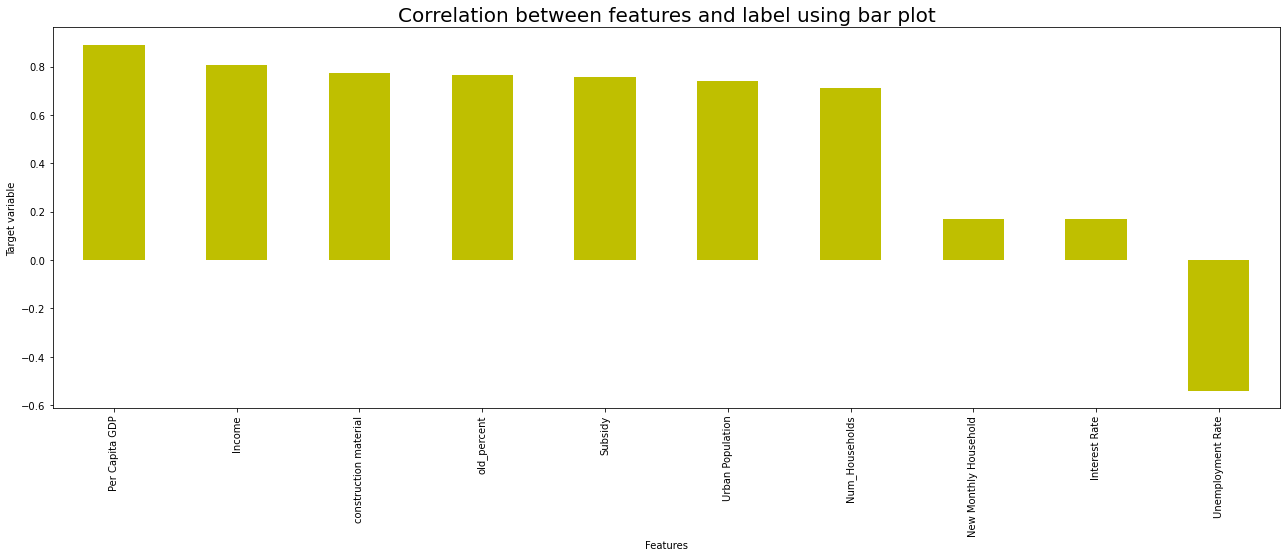

In [43]:
#Visualizing the correlation between the features and the label using bar plot

plt.figure(figsize=(22,7))
df.corr()['S&P'].sort_values(ascending=False).drop(['S&P']).plot(kind='bar',color='y')
plt.title("Correlation between features and label using bar plot",fontsize=20)
plt.xlabel("Features")
plt.ylabel("Target variable")
plt.show()

### Seperating features and label

In [44]:
x=df.drop(['S&P'],axis=1)
y=df["S&P"]

In [45]:
print("Feature dimensions:",x.shape)
print("Target dimensions:",y.shape)

Feature dimensions: (232, 10)
Target dimensions: (232,)


### Feature scaling using standard scalarisation 

It is the process of transforming the features of a dataset to ensure that they are on a similar scale.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Per Capita GDP,old_percent,Urban Population,Subsidy,Num_Households,New Monthly Household,Unemployment Rate,construction material,Interest Rate,Income
0,-1.748925,-1.090113,-1.600744,-1.700096,-1.750920,0.957012,-0.122769,-1.852249,0.637107,-1.624059
1,-1.730900,-1.090113,-1.600744,-1.700096,-1.750920,1.045853,-0.122769,-1.845838,0.642436,-1.612229
2,-1.712874,-1.090113,-1.600744,-1.700096,-1.750920,0.790721,-0.122769,-1.813786,0.637107,-1.607053
3,-1.694849,-1.090113,-1.600744,-1.700096,-1.750920,0.941067,-0.006107,-1.804170,0.647744,-1.582465
4,-1.687823,-1.090113,-1.600744,-1.700096,-1.750920,1.123304,-0.064103,-1.794555,0.647744,-1.552989
...,...,...,...,...,...,...,...,...,...,...
227,1.979886,2.184424,1.846905,2.331205,1.525379,0.250842,0.164041,2.077383,-1.139232,2.010619
228,2.151823,2.184424,1.846905,2.331205,1.525379,0.515086,0.107947,2.949210,-1.182530,2.373056
229,2.194160,2.184424,1.846905,2.331205,1.525379,0.285011,-0.064103,3.401150,-1.230176,2.120773
230,2.278835,2.184424,1.846905,2.331205,1.525379,0.339683,-0.302993,3.646095,-1.062434,2.129476


### Creating train test split 

In [47]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is:",maxAccu,"on random state",maxRS)

Maximum R2 score is: 0.9828773467837761 on random state 146


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS) 

In [52]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [50]:
#Importing all the regressor models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [53]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_LR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score: 0.9828773467837761
R2 score on training data: 97.14156152695347
Mean Absolute Error: 3.458140050354248
Mean Squared Error: 16.93807908799226
Root Mean Squared Error: 4.1155897618679465


In [54]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_RFR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score: 0.9956520388394923
R2 score on training data: 99.7869046824879
Mean Absolute Error: 1.4534774285714616
Mean Squared Error: 4.301092189288702
Root Mean Squared Error: 2.0739074688347845


In [55]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.9929357843021712
R2 score on training data: 98.92202270897272
Mean Absolute Error: 2.0113228571428556
Mean Squared Error: 6.988066783428564
Root Mean Squared Error: 2.643495183167271


In [56]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_GBR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score: 0.9834917165892194
R2 score on training data: 99.95272598325245
Mean Absolute Error: 2.296486451415961
Mean Squared Error: 16.330331899372407
Root Mean Squared Error: 4.041080536115608


In [57]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lasso))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.9543624098738851
R2 score on training data: 94.80143156113508
Mean Absolute Error: 5.396756772366913
Mean Squared Error: 45.14563842296791
Root Mean Squared Error: 6.719050410807164


In [58]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_rd))
print("Mean Squared Error:",mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.9787433412109877
R2 score on training data: 96.80394432298233
Mean Absolute Error: 3.7745231824942396
Mean Squared Error: 21.027522029915854
Root Mean Squared Error: 4.585577611371969


In [59]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.9813688537423314
R2 score on training data: 100.0
Mean Absolute Error: 2.5998857142857124
Mean Squared Error: 18.430311285714264
Root Mean Squared Error: 4.293053841464635


In [63]:
# We can see that Random Forest has the best R2 score so we will be going wit it

### HyperParameter tuning 

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
param = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'criterion': ['mse', 'mae'],          # Criterion for splitting
    'max_depth': [None, 10, 20],           # Maximum depth of the trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Maximum number of features considered for splitting
    'max_leaf_nodes': [None, 10, 20, 30]   # Maximum number of leaf nodes in each tree
}

In [68]:
gscv=GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [69]:
gscv.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'n_estimators': 100}

In [70]:
Model=RandomForestRegressor(criterion='mae',
 max_depth= 10,
 max_features= 'log2',
 max_leaf_nodes= 30,
 n_estimators= 100)

In [71]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 0.9952644711764193
Mean Absolute Error: 1.62983185714285
Mean Squared Error: 4.6844820556943265
Root Mean Squared Error: 2.1643664328607404


In [72]:
import pickle
filename='S&P Case-Schiller.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved model

In [73]:
#loading the model

loaded_model=pickle.load(open('S&P Case-Schiller.pkl','rb'))  #read binary mode
result=loaded_model.score(x_test,y_test)
print(result*100)

99.52644711764192


After loading the trained model using pickle.load(), we then use the score() method of the model to evaluate its performance on the test data.

In [74]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])   
conclusion

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Predicted,177.19393,166.752735,156.283085,223.96779,201.39797,122.922105,140.27412,249.242355,182.3908,168.187165,...,136.310005,181.17052,208.483275,141.27098,158.212245,121.735495,153.13363,173.44411,156.672695,204.88501
original,180.91000,166.659000,155.604000,219.37800,198.31500,123.830000,136.53300,253.407000,183.0100,167.501000,...,136.294000,181.85200,209.287000,137.90400,160.308000,119.611000,156.14200,174.79200,152.633000,206.15600


In [75]:
conclusion_vertical = conclusion.transpose()

In [76]:
conclusion_vertical

,Predicted,original
0,177.193930,180.910
1,166.752735,166.659
2,156.283085,155.604
3,223.967790,219.378
4,201.397970,198.315
...,...,...
65,121.735495,119.611
66,153.133630,156.142
67,173.444110,174.792
68,156.672695,152.633


# NOTE

A few variables that could have been studied are below.

Net-immigration (It is supposed to have a positive impact. No suitable data could be found)

Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)

Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)

Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)

Tax Rate (Too many brackets (7) and could not analyse due to time)

Number of active listings (Data prior to 2017 was not found)